In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

from sklearn.preprocessing import StandardScaler

In [2]:
path = "../Data/Wine_Quality_Dataset/WineQT.csv"

In [3]:
wine = pd.read_csv(path).drop(["Id"], axis=1)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [6]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


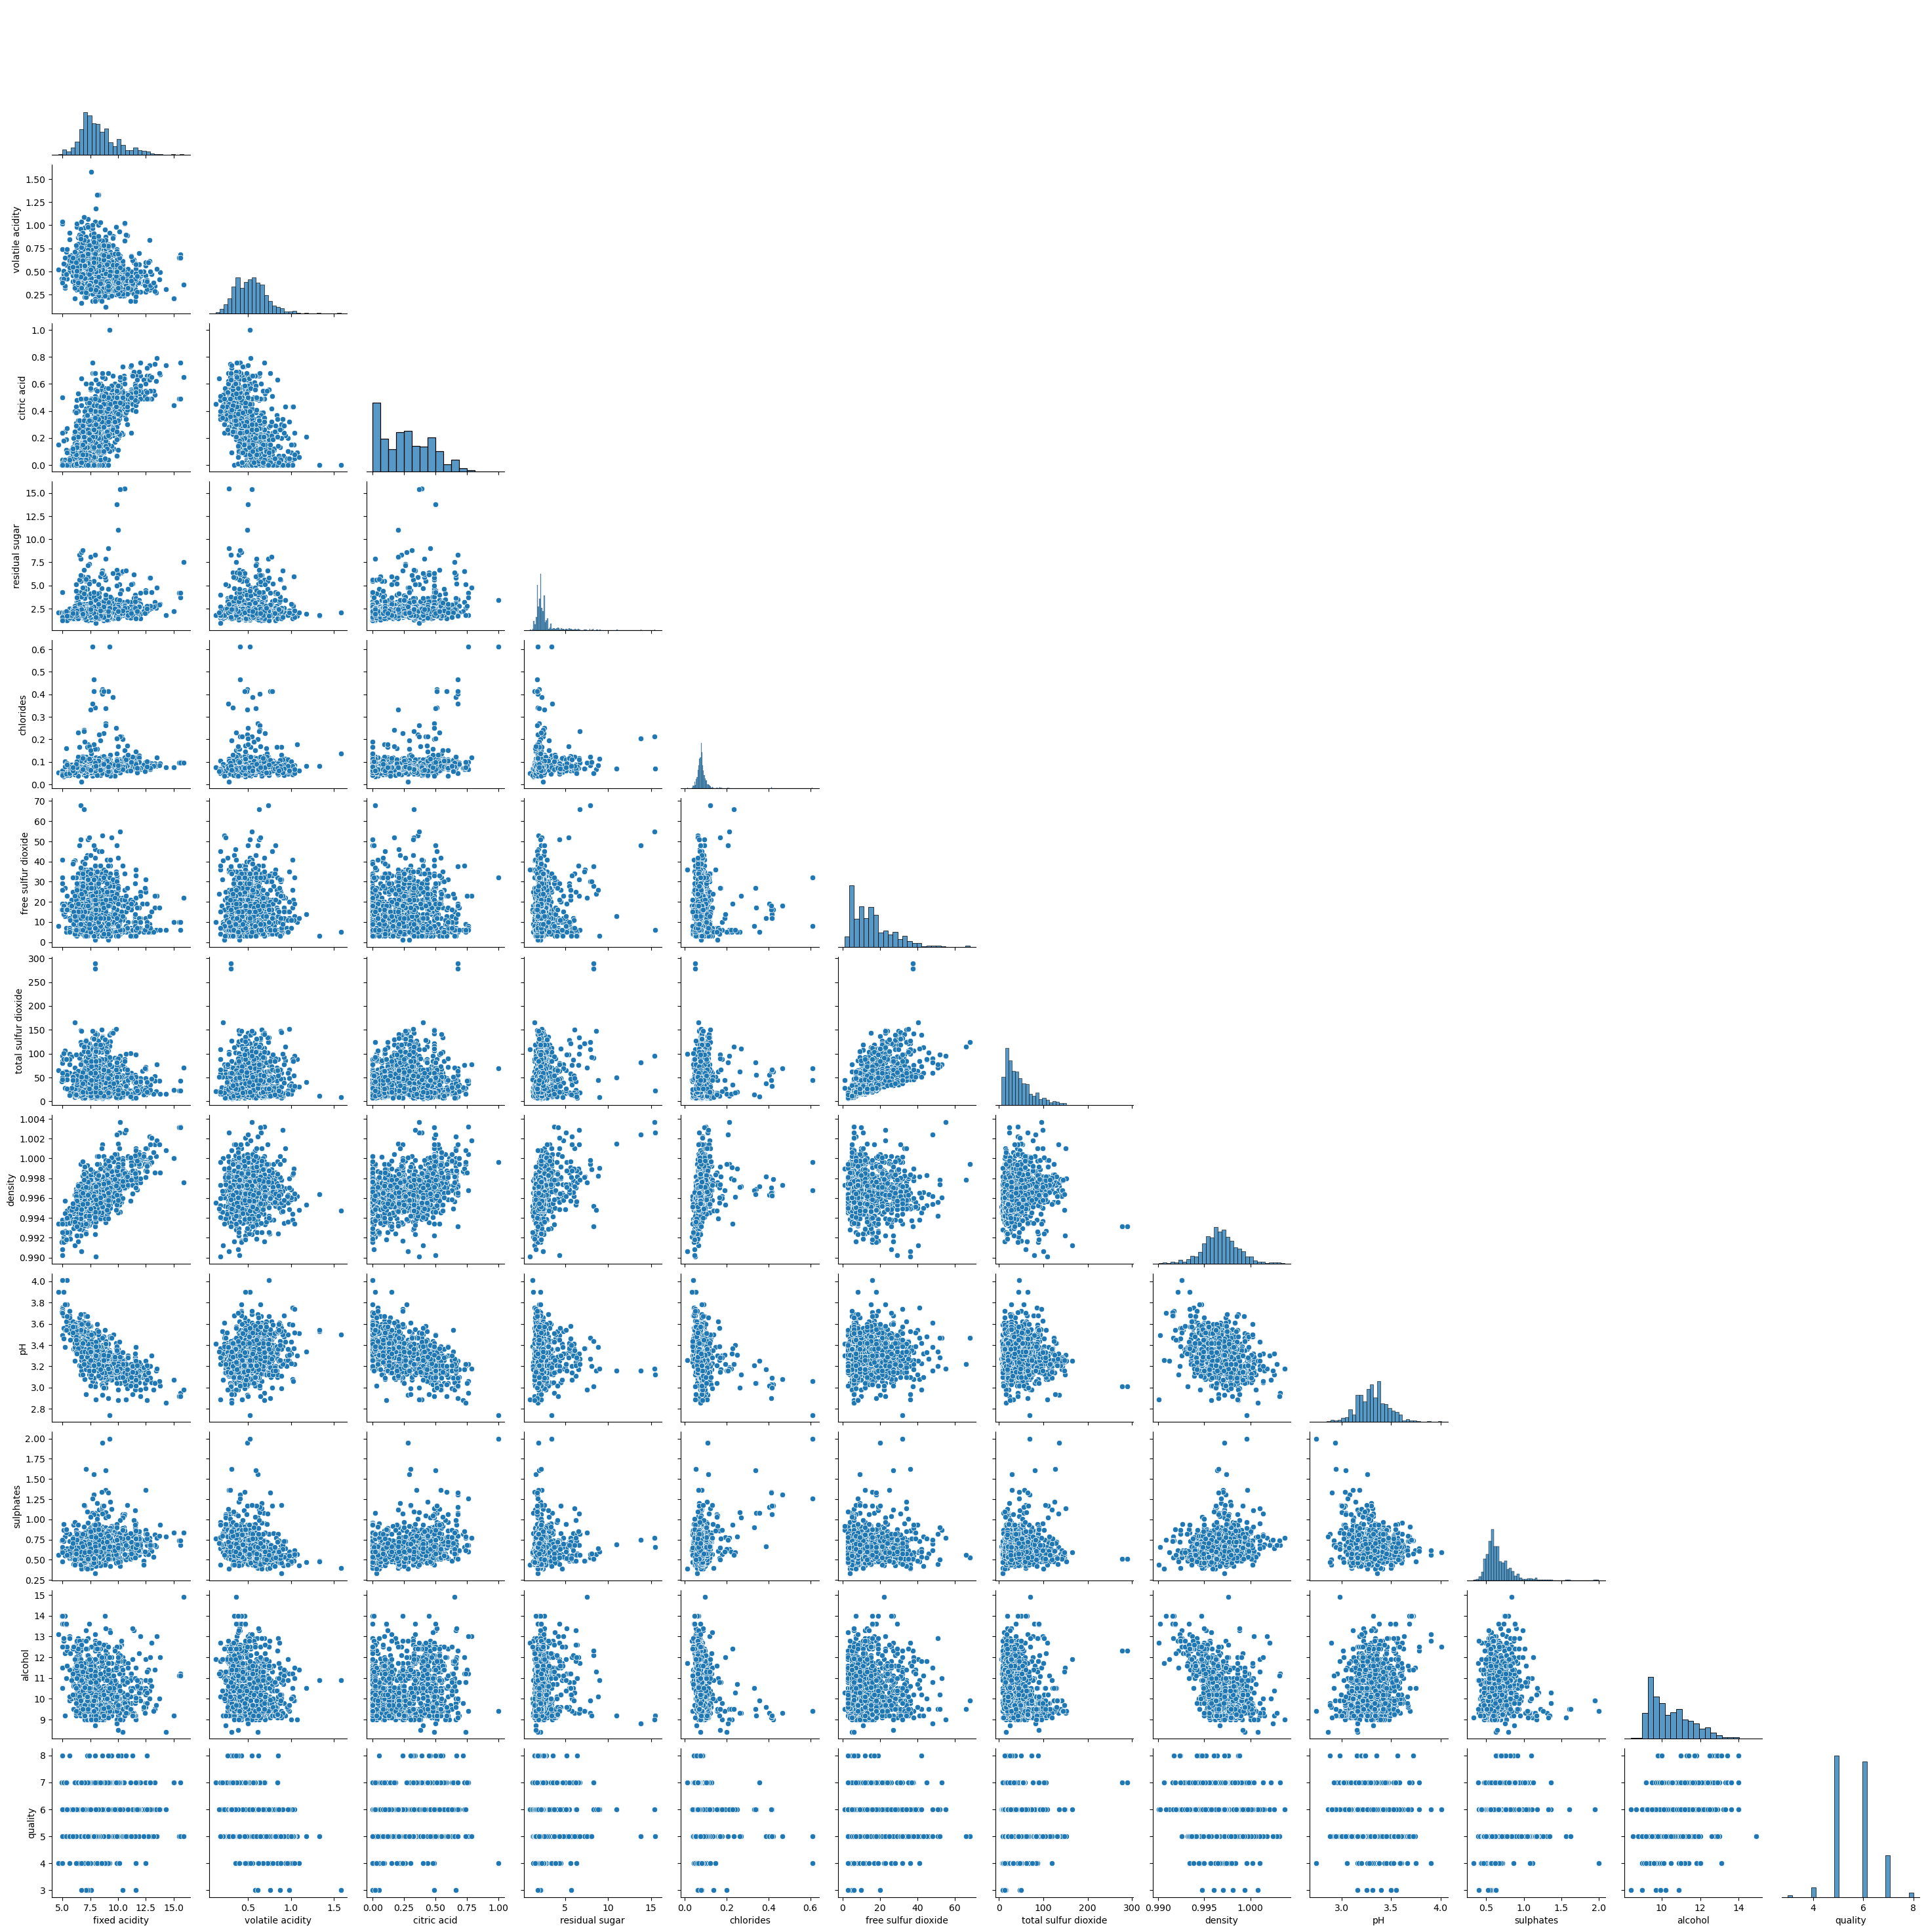

In [7]:
sns.pairplot(wine, corner=True);

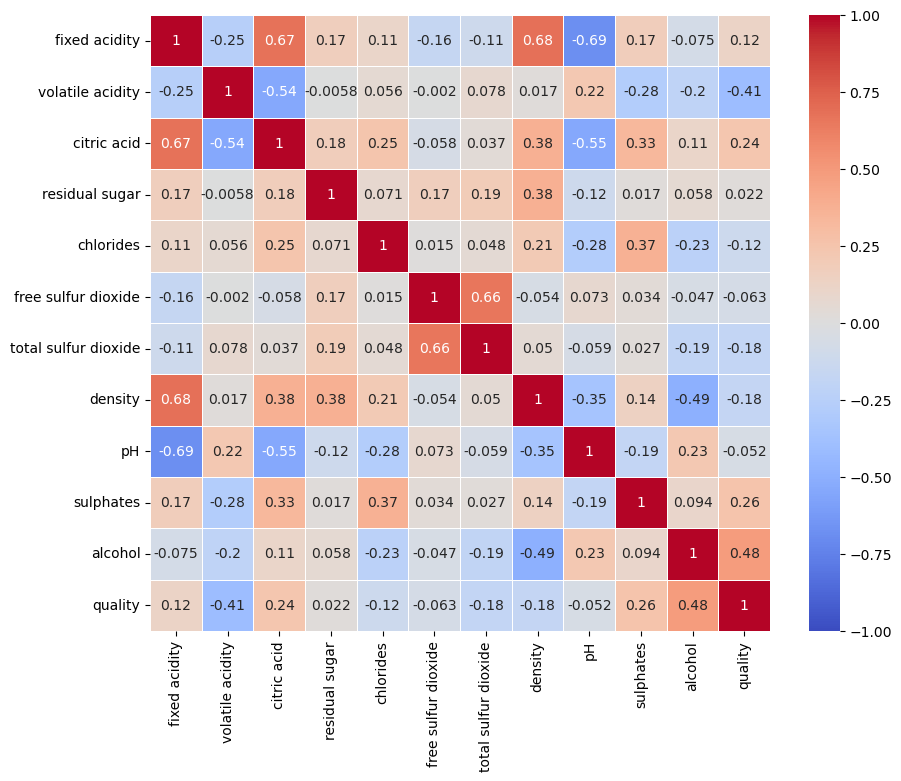

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(wine.corr(),
           vmin=-1,
           vmax=1,
           linewidths=0.5,
           annot=True,
           cmap="coolwarm")
plt.show()

In [9]:
wine.quality.value_counts().sort_index()

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

In [10]:
X = sm.add_constant(wine.drop(["quality"], axis=1))
y = wine.quality

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [11]:
std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

## Random Forest

In [12]:
classifier = RandomForestClassifier(n_estimators=1000, criterion="entropy", random_state=12345)
classifier.fit(X_tr, y)

RandomForestClassifier(criterion='entropy', n_estimators=1000,
                       random_state=12345)

In [13]:
y_pred = classifier.predict(X_te)

In [14]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred).round(3)

0.69

## Support Vector Machine (SVC)

In [15]:
svm_refressor = SVC(kernel="linear", random_state=12345)
svm_refressor.fit(X_tr, y)

SVC(kernel='linear', random_state=12345)

In [16]:
cm_svc = confusion_matrix(y_test, svm_refressor.predict(X_te))
accuracy_score(y_test, svm_refressor.predict(X_te)).round(3)

0.559

## Stochastic Gradient Descent

In [17]:
sgd_classifier = SGDClassifier(loss="log_loss", alpha=0.01, max_iter=1000, random_state=12345)
sgd_classifier.fit(X_tr, y)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=12345)

In [18]:
sgd_y_predict = sgd_classifier.predict(X_te)

In [19]:
cm_gr_descent = confusion_matrix(y_test, sgd_y_predict)
accuracy_score(y_test, sgd_y_predict).round(3)

0.568